### Importação dos dados



In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [43]:
#Unindo os dados das quatro lojas em um único DataFrame
dados = pd.concat([loja, loja2, loja3, loja4])

#primeiras linhas pra conferir
dados.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja_1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja_1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja_1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja_1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja_1


#1. Análise do faturamento


Requisitos:
Analisar os dados das lojas:

Você deve avaliar informações como faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais vendidos e frete médio.

In [45]:
#Adicionando uma coluna para identificar a loja de cada dado
loja['loja'] = 'loja_1'
loja2['loja'] = 'loja_2'
loja3['loja'] = 'loja_3'
loja4['loja'] = 'loja_4'

#Criar uma nova coluna de faturamento (preço + frete)
dados['faturamento'] = dados['Preço'] + dados['Frete']

#Faturamento por loja
faturamento_por_loja = dados.groupby('loja')['faturamento'].sum().sort_values(ascending=False)
print("\nFaturamento por Loja:")
print(faturamento_por_loja)

#Faturamento total
faturamento_total = dados['faturamento'].sum()
print(f"\nFaturamento Total: R$ {faturamento_total:,.2f}")



Faturamento por Loja:
loja
loja_1    1.616347e+06
loja_2    1.567773e+06
loja_3    1.542048e+06
loja_4    1.458253e+06
Name: faturamento, dtype: float64

Faturamento Total: R$ 6,184,421.45


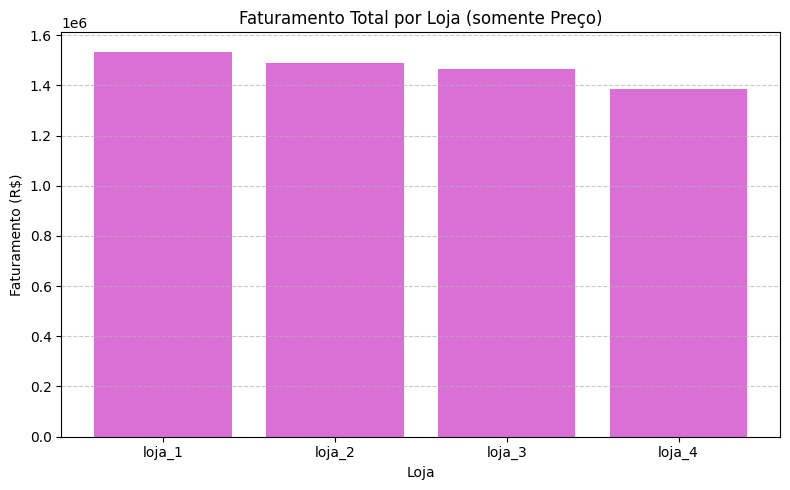

In [46]:
#Calculando o faturamento (somente a soma dos preços)
faturamento_precos = dados.groupby("loja")["Preço"].sum().sort_values(ascending=False)

#gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(faturamento_precos.index, faturamento_precos.values, color='orchid')
plt.title("Faturamento Total por Loja (somente Preço)")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [25]:
# Agrupar pela categoria do produto e somar a quantidade vendida
resultado_categoria = dados.groupby(['Categoria do Produto'])['Produto'].count().reset_index(name='Quantidade')

# Ordenar os resultados pela quantidade
resultado_categoria.sort_values(by='Quantidade', ascending=False, inplace=True)

# Exibir o resultado consolidado
print("Quantidade Total de Produtos Vendidos por Categoria:")
print(resultado_categoria)

# Agrupar pela loja e pela categoria do produto e contar as vendas
resultado_categoria_loja = dados.groupby(['loja', 'Categoria do Produto']).size().reset_index(name='Quantidade')

# Exibir o resultado por loja
for loja in resultado_categoria_loja['loja'].unique():
    print(f"\nLoja: {loja}")
    print(resultado_categoria_loja[resultado_categoria_loja['loja'] == loja])

Quantidade Total de Produtos Vendidos por Categoria:
    Categoria do Produto  Quantidade
6                 moveis        1886
2            eletronicos        1772
0             brinquedos        1290
1       eletrodomesticos        1149
3        esporte e lazer        1113
4  instrumentos musicais         753
5                 livros         742
7  utilidades domesticas         730

Loja: loja_1
     loja   Categoria do Produto  Quantidade
0  loja_1             brinquedos         324
1  loja_1       eletrodomesticos         312
2  loja_1            eletronicos         448
3  loja_1        esporte e lazer         284
4  loja_1  instrumentos musicais         182
5  loja_1                 livros         173
6  loja_1                 moveis         465
7  loja_1  utilidades domesticas         171

Loja: loja_2
      loja   Categoria do Produto  Quantidade
8   loja_2             brinquedos         313
9   loja_2       eletrodomesticos         305
10  loja_2            eletronicos         4

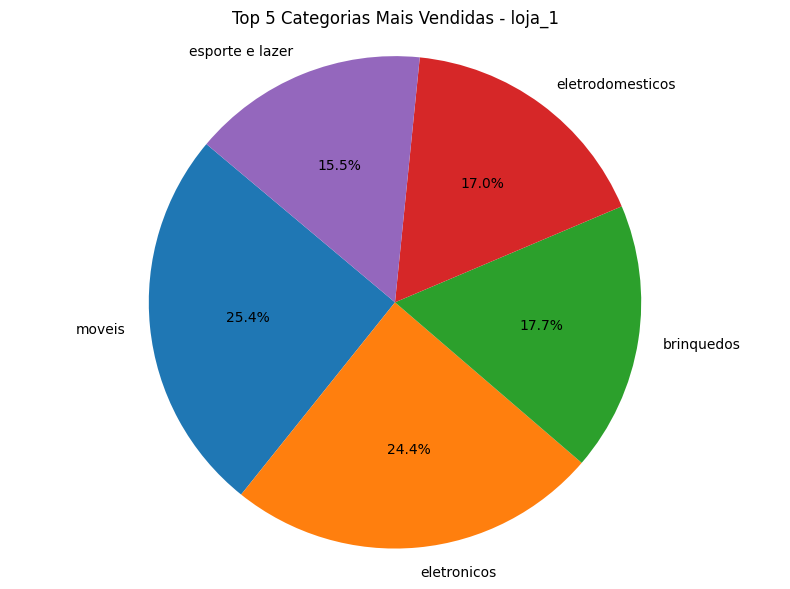

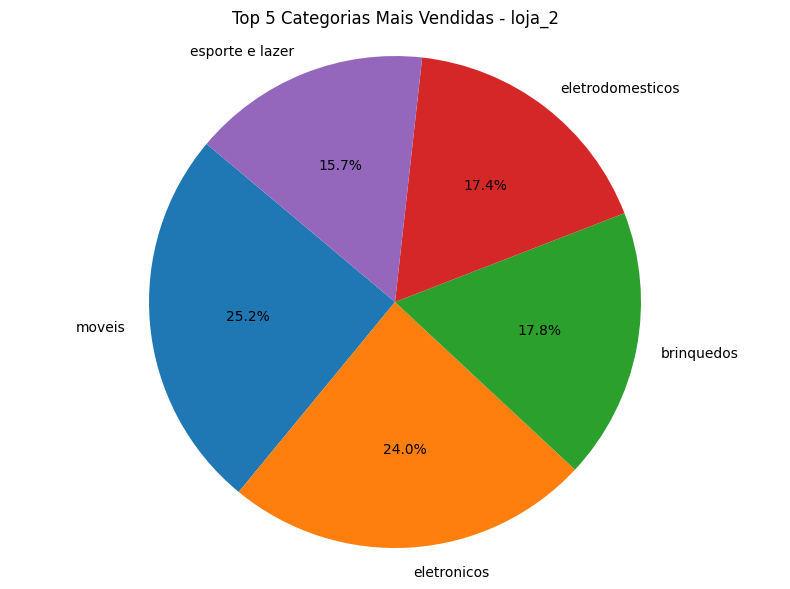

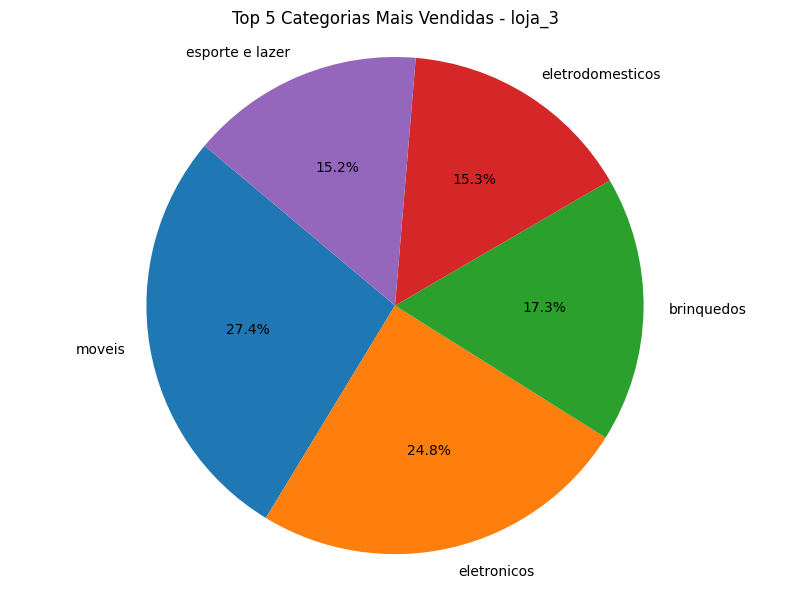

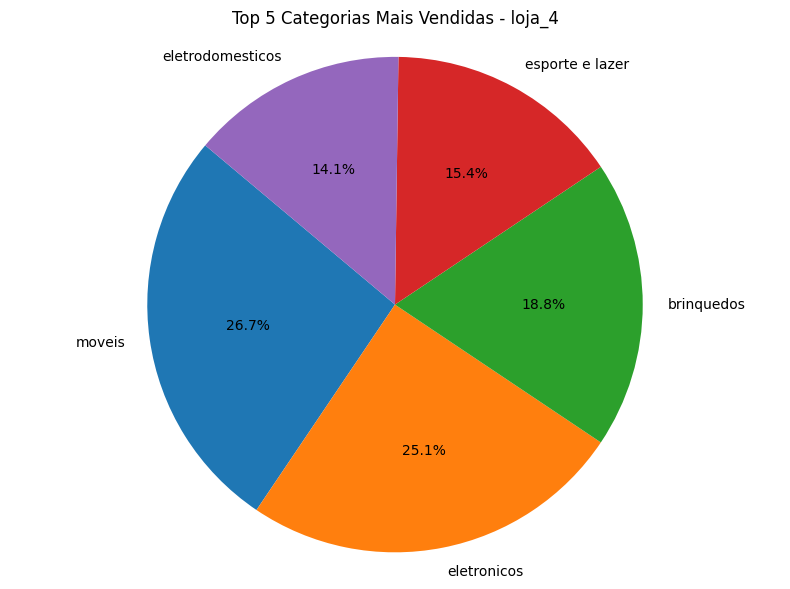

In [26]:
#gráfica em gráficos de pizza
for loja in resultado_categoria_loja['loja'].unique():
    top_categorias = resultado_categoria_loja[resultado_categoria_loja['loja'] == loja].sort_values(by='Quantidade', ascending=False).head(5)

    plt.figure(figsize=(8, 6))
    plt.pie(top_categorias['Quantidade'], labels=top_categorias['Categoria do Produto'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Categorias Mais Vendidas - {loja}')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# 3. Média de Avaliação das Lojas

In [27]:
#Média geral de avaliação
media_geral = dados['Avaliação da compra'].mean()
print(f"Média geral das avaliações: {media_geral:.2f}")

#Média de avaliação por loja
media_por_loja = dados.groupby('loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print("\nMédia das avaliações por loja:")
print(media_por_loja)


Média geral das avaliações: 4.01

Média das avaliações por loja:
loja
loja_3    4.048326
loja_2    4.037304
loja_4    3.995759
loja_1    3.976685
Name: Avaliação da compra, dtype: float64


<ipython-input-28-5050fb33f5af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_loja.values, y=media_por_loja.index, palette='crest')


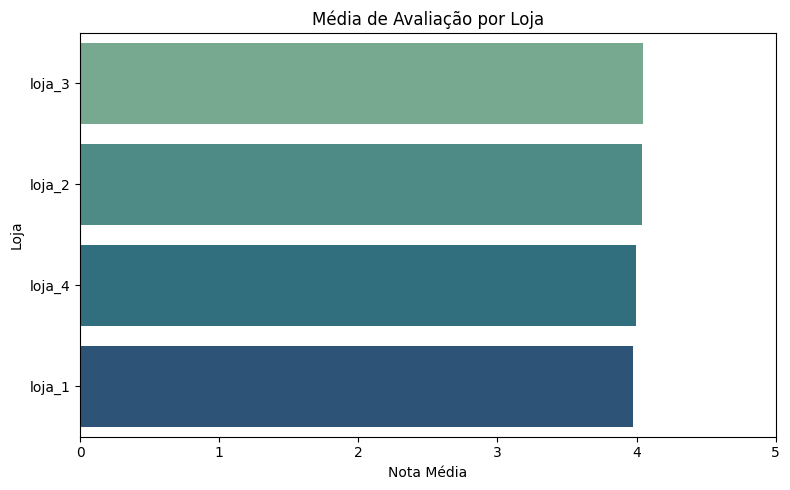

In [28]:
#Gráfico de barras com avaliação média por loja
plt.figure(figsize=(8,5))
sns.barplot(x=media_por_loja.values, y=media_por_loja.index, palette='crest')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Nota Média')
plt.ylabel('Loja')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

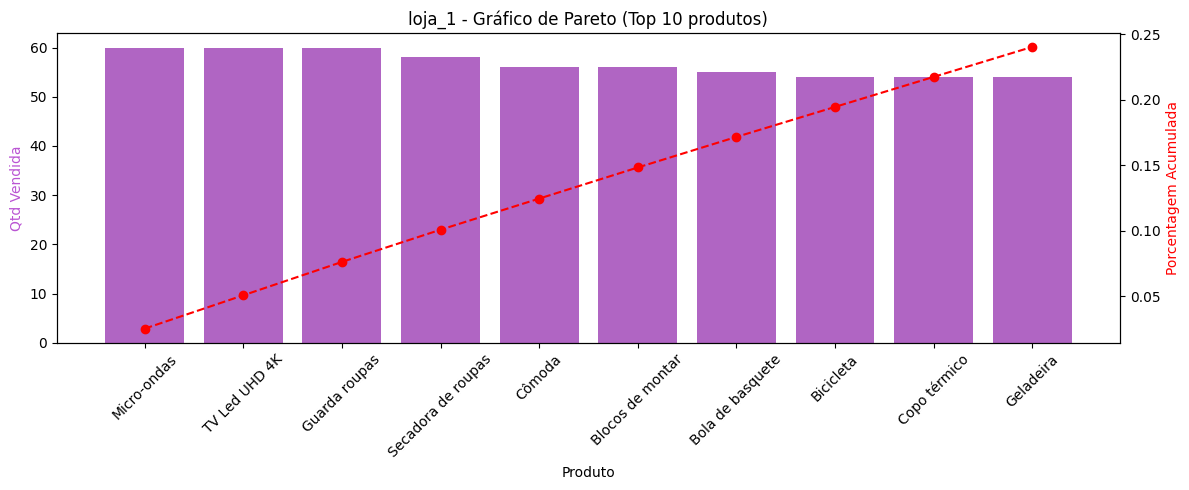

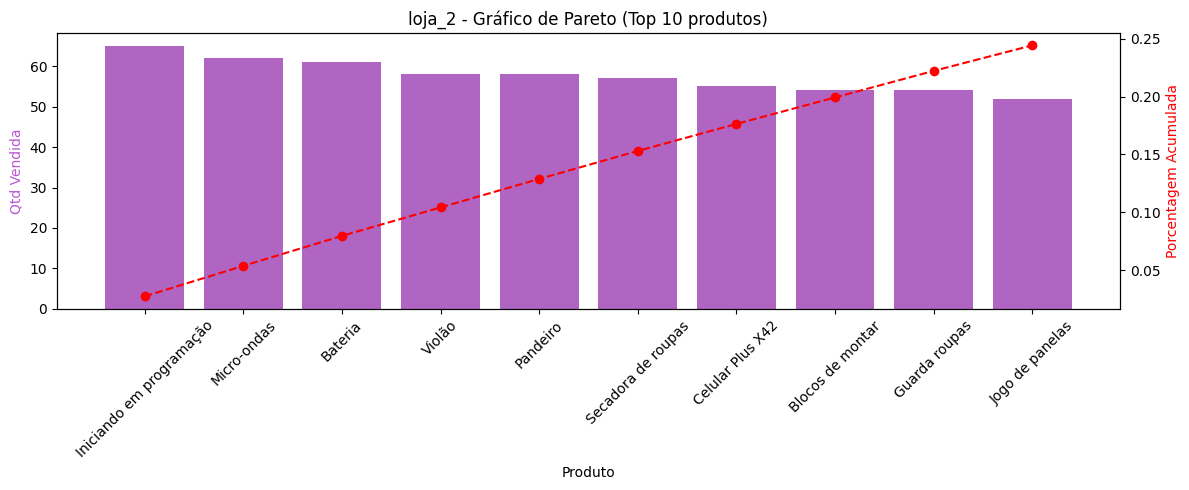

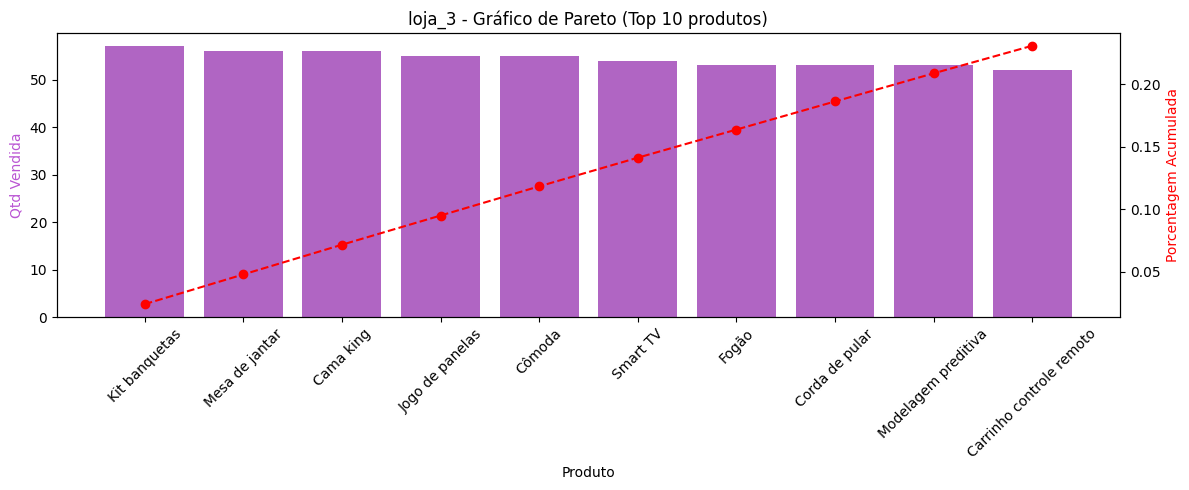

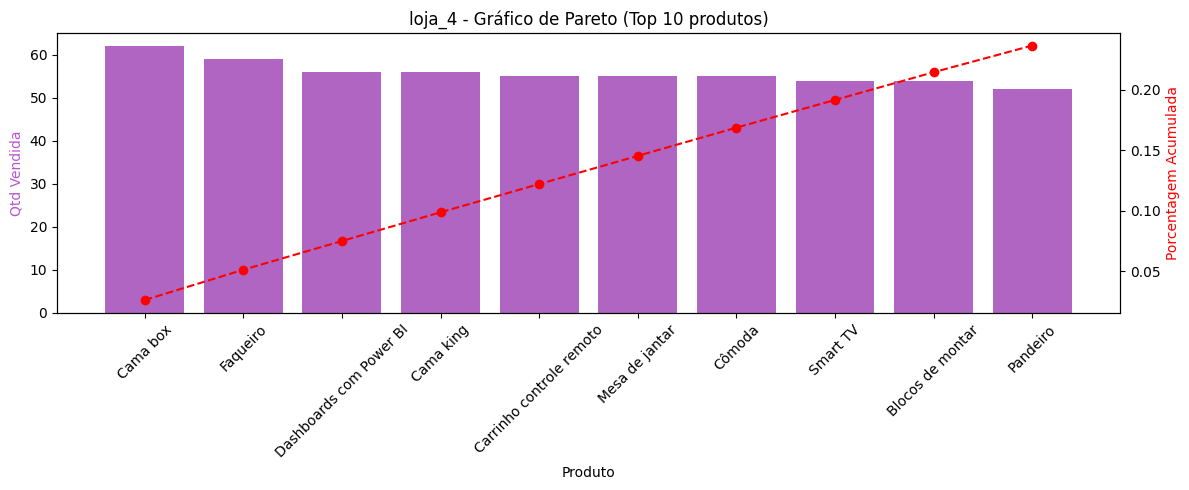

In [47]:
#gráfico por loja
for loja in dados["loja"].unique():
    produtos_loja = dados[dados["loja"] == loja]

    #Agrupa os produtos e soma a quantidade vendida
    top_produtos = produtos_loja["Produto"].value_counts().sort_values(ascending=False)
    top_produtos_pct = top_produtos.cumsum() / top_produtos.sum()

    fig, ax1 = plt.subplots(figsize=(12, 5))

    #Gráfico de barras (quantidade vendida)
    sns.barplot(x=top_produtos.index[:10], y=top_produtos.values[:10], ax=ax1, color="mediumorchid")
    ax1.set_ylabel("Qtd Vendida", color="mediumorchid")
    ax1.set_xlabel("Produto")
    ax1.set_title(f"{loja} - Gráfico de Pareto (Top 10 produtos)")
    ax1.tick_params(axis='x', rotation=45)

    #Linha de porcentagem acumulada
    ax2 = ax1.twinx()
    ax2.plot(top_produtos.index[:10], top_produtos_pct[:10], marker="o", linestyle="--", color="red")
    ax2.set_ylabel("Porcentagem Acumulada", color="red")

    plt.tight_layout()
    plt.show()



# 5. Frete Médio por Loja


Frete médio por loja:
loja
loja_4    31.278997
loja_3    33.074464
loja_2    33.621941
loja_1    34.691805
Name: Frete, dtype: float64


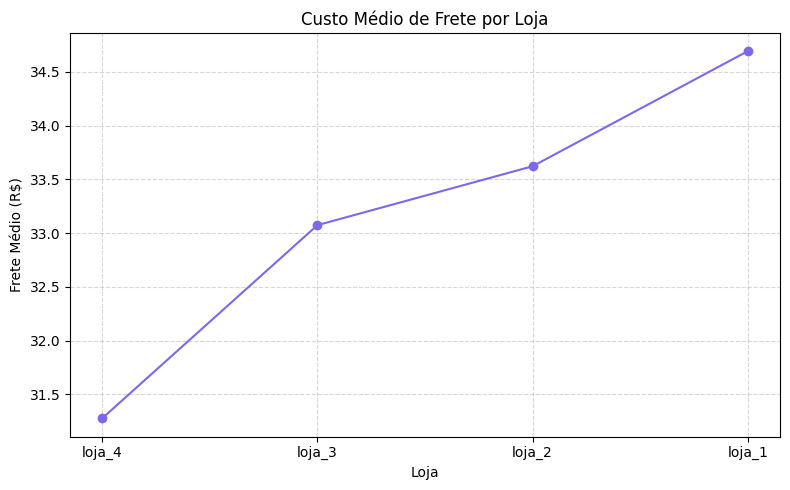

In [30]:
#Cálculo do frete médio por loja
frete_medio = dados.groupby("loja")["Frete"].mean().sort_values()

#valores
print("Frete médio por loja:")
print(frete_medio)

#Gráfico de linha
plt.figure(figsize=(8, 5))
plt.plot(frete_medio.index, frete_medio.values, marker='o', linestyle='-', color='mediumslateblue')
plt.title("Custo Médio de Frete por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio (R$)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **RESULTADO:**

## Recomendação Final

Relatório Final de Análise das Lojas Alura Store

O Senhor João na decisão sobre qual loja da Alura Store deve ser vendida. Para isso, realizei uma investigação completa dos dados de quatro lojas, considerando os seguintes critérios:

* Faturamento total

* Categorias mais e menos vendidas

* Avaliação média dos clientes

* Produtos mais e menos vendidos

* Custo médio de frete

Com base nos gráficos gerados e nos dados analisados, este relatório apresenta uma recomendação final clara e objetiva, destacando os pontos fortes e fracos de cada loja.

Desenvolvimento da Análise

#Faturamento Total
Loja	Faturamento (R$)

loja_1 ---	1.616.347

loja_2 ---	1.567.773

loja_3 ---	1.542.048

loja_4 ---	1.458.253


O gráfico revelou que:

* Loja 1 apresentou o maior faturamento entre todas.

* Loja 4 teve o menor desempenho financeiro.

#Categorias Mais Vendidas
A análise das categorias mostrou que:

* Loja 3 tem uma boa diversificação de categorias, com destaque para eletrônicos e utilidades.

* Loja 2 se concentrou em menos categorias, com maior volume em apenas uma.

#Avaliação Média dos Clientes
Média de Avaliações por Loja

loja_1 ---	3.98

loja_2 ---	4.04

loja_3 ---	4.05

loja_4 ---	4.00

avaliação:

* Loja 2 e Loja 3 têm as melhores médias de satisfação dos clientes.

* Loja 1 apresentou a menor avaliações, o que pode indicar problemas de atendimento ou produto.

#Produtos Mais e Menos Vendidos
O gráfico indicou:

* Loja 1 possui uma base sólida de produtos com alto giro.

* Loja 2 e Loja 4 têm produtos com baixa rotatividade, o que pode indicar estoque parado.

#Frete Médio
A análise do frete mostrou que:

Loja ---	Frete Médio (R$)

loja_1 ---	34.69

loja_2 ---	33.62

loja_3 ---	33.07

loja_4 ---	31.28
* Loja 4 tem o frete mais baixo em média, o que pode atrair mais clientes.

* Loja 1 apresenta o frete mais caro, o que pode ser um ponto negativo.

# Conclusão e Recomendação

* A loja 1 lidera em faturamento, mas tem a menor média de avaliação e o frete mais alto. (Apesar de um frete um pouco acima da média, seus resultados compensam esse custo).

* A loja 2 é bastante equilibrada. (mas não lidera em nenhuma métrica principal).

* A loja 3 tem a melhor avaliação dos clientes. (uma categoria campeã em vendas móveis e um frete equilibrado).

* A loja 4 possui o menor custo de frete. (mas tem o menor faturamento e baixa rotatividade de produtos).

Após a análise de todos os fatores, eu recomendo que o Senhor João deve considerar vender a Loja 4.

# Extra!  Análise de Desempenho Geográfico

In [31]:
#mapa base centrado aproximadamente no Brasil
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

#os dados de calor
heat_dado = dados[['lat', 'lon']].dropna().values.tolist()

#Adicionando o heatmap
HeatMap(heat_dado, radius=10, blur=15, min_opacity=0.5).add_to(mapa)

#Exibir o mapa
mapa
